In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [4]:
# hence we can remove the columns Alley, PoolQC ,Fence,  MiscFeature,FireplaceQu as their 50% of data is missing.   

In [5]:
df.drop(columns=["Alley","PoolQC" ,"Fence","MiscFeature","FireplaceQu"],axis=1,inplace=True)


In [6]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# baseline Model 

In [7]:
df2=pd.read_csv("test.csv")
u=[]
for _ in range(1459):
    u.append(180921)
u=np.array(u)


In [8]:
df2['sale']=u
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,sale
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,180921
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,180921
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,180921
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,180921
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,180921


In [9]:
#end of baseline model

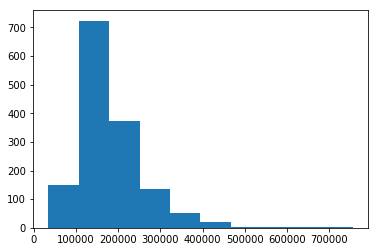

In [10]:
plt.hist(df['SalePrice'])
plt.show()

In [11]:
#as this histogram is not normal distribution so we shuold apply transformation


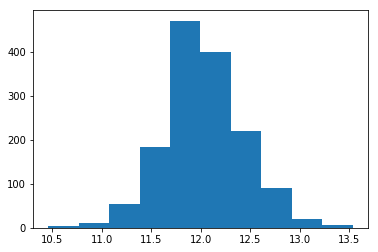

In [12]:
plt.hist(np.log(df["SalePrice"]))
plt.show()

In [13]:
# so after applying logarithmic transformation it is nearly normal.

In [14]:
#  'OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF' seems to be most important factors
#so now drawing scatter plot between saleprice and them 

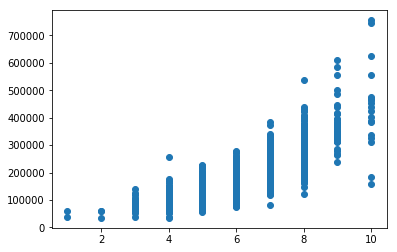

In [15]:
plt.scatter(df["OverallQual"],df["SalePrice"])
plt.show()

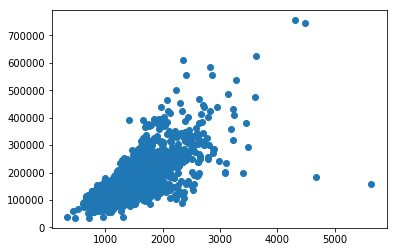

In [16]:
plt.scatter(df["GrLivArea"],df["SalePrice"])

plt.show()

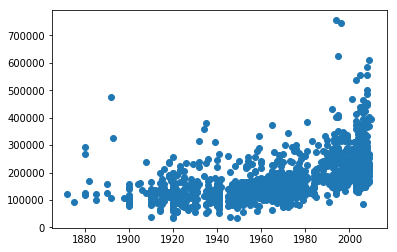

In [17]:
plt.scatter(df["YearBuilt"],df["SalePrice"])
plt.show()

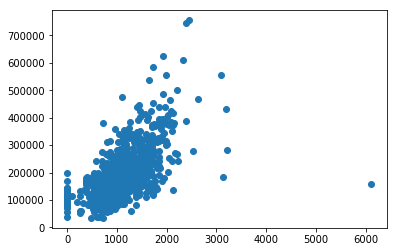

In [18]:

plt.scatter(df["TotalBsmtSF"],df["SalePrice"])
plt.show()

In [19]:
#as totalsf can be calculated as sum of totalbsmtsf, 1stflrsf+2ndflrse

In [20]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['1stFlrSF'] = df['1stFlrSF'].fillna(0)
df['2ndFlrSF'] = df['2ndFlrSF'].fillna(0)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)


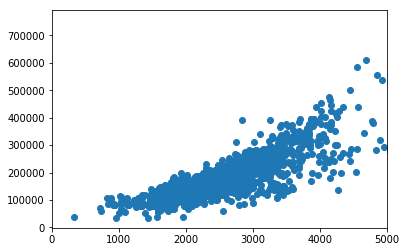

In [21]:
plt.scatter(df['TotalSF'],df["SalePrice"])
plt.xlim(0,5000)
plt.show()

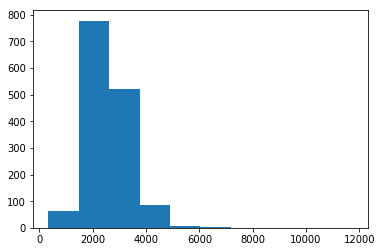

In [22]:
plt.hist(df["TotalSF"])
plt.show()

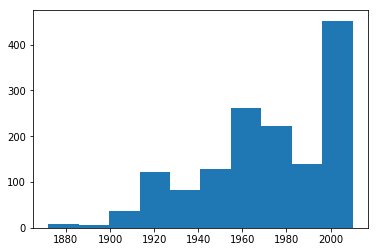

In [23]:
plt.hist(df["YearBuilt"])
plt.show()

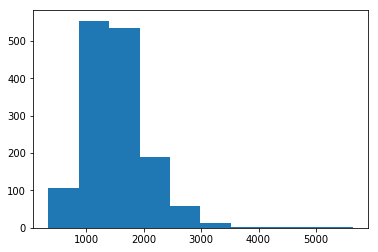

In [24]:

plt.hist(df["GrLivArea"])
plt.show()

In [25]:
#As none of the above variable give normal distribution so linear regression assumptions fails here and there are too many ouliers on all of them

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [27]:
a=LinearRegression()
x=np.asanyarray(df[["TotalSF"]])
y=np.asanyarray(df[["SalePrice"]])


In [28]:
from sklearn.model_selection import train_test_split
from math import *

[0.220719975924137, 0.22033334079527192, 0.22026943198714014, 0.22027218730845757, 0.2201410842679831, 0.21983960685983103, 0.21954292667123682, 0.21963957145375945, 0.2204641690986325, 0.2221610160307373]


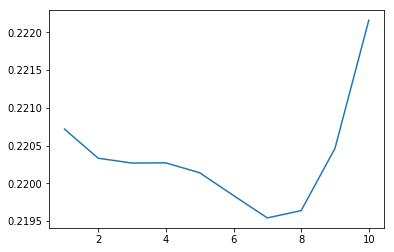

In [29]:
a=LinearRegression()
x=np.asanyarray(df[["TotalSF"]] )
y=np.asanyarray(df[["SalePrice"]])
Xn=[]
Yn=[]
X1n=[]
Y1n=[]
mean = np.mean(x, axis=0)
sd = np.std(x, axis=0)
for w,n in enumerate(x):
    if (n > mean - 2 * sd):                  # removing outliers
        Xn.append(n)
        Yn.append(y[w])
for w,n in enumerate(Xn):
    if (n < mean + 2 * sd):
        X1n.append(n)
        Y1n.append(Yn[w])
X1n=np.array(X1n)
Y1n=np.array(Y1n) 
Y1n=np.log(Y1n)    # log transformation of data
i=[]
m=[1,2,3,4,5,6,7,8,9,10]
train_x,test_x,train_y,test_y=train_test_split(X1n,Y1n,test_size=0.5)
for f in range(1,11):
    poly = PolynomialFeatures(degree = f) 
    X_poly = poly.fit_transform(train_x) 
    poly.fit(X_poly, train_y) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, train_y)
    ypredict=lin2.predict(poly.fit_transform(test_x))
    msqe=np.mean((ypredict-test_y)**2)   # MEAN SQUARE ERROR
    rmsque=sqrt(msqe)                        # ROOT MEAN SQUARE ERROR
    i.append(rmsque)
print(i)
plt.plot(m,i)
plt.show()


In [ ]:
#so the degree of polynomial will be 7 because at this value root mean square error is least


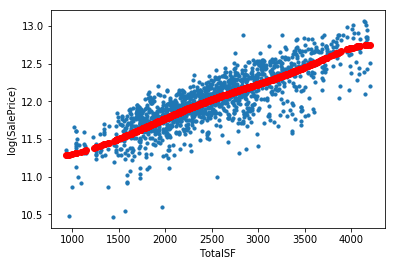

In [30]:
poly = PolynomialFeatures(degree = 7) 
X_poly = poly.fit_transform(train_x) 
poly.fit(X_poly, train_y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, train_y) 
plt.scatter(X1n,Y1n, s=10)
predicted=lin2.predict(poly.fit_transform(train_x))
plt.plot(train_x,predicted, "ro")
plt.xlabel('TotalSF')
plt.ylabel('log(SalePrice)')
plt.show()

In [31]:
df1=pd.read_csv("test.csv")
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
df1.drop(columns=["Alley","PoolQC" ,"Fence","MiscFeature","FireplaceQu"],axis=1,inplace=True)

In [33]:
df1['TotalBsmtSF'] = df1['TotalBsmtSF'].fillna(0)
df1['1stFlrSF'] = df1['1stFlrSF'].fillna(0)
df1['2ndFlrSF'] = df1['2ndFlrSF'].fillna(0)
df1['TotalSF'] = df1['TotalBsmtSF'] + df1['1stFlrSF'] + df1['2ndFlrSF']
df1.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)


In [34]:
x1=np.asanyarray(df1[["TotalSF"]] )
predicted=lin2.predict(poly.fit_transform(x1))

In [35]:
df1["SalePrice"]=np.exp(predicted)
df1["SalePrice"]=np.round_(df1["SalePrice"])
df["SalePrice"]=df["SalePrice"].astype("int64")

In [36]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,120,0,0,6,2010,WD,Normal,1778.0,114933.0
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,12500,6,2010,WD,Normal,2658.0,178606.0
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,3,2010,WD,Normal,2557.0,171115.0
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,6,2010,WD,Normal,2530.0,169109.0
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,144,0,0,1,2010,WD,Normal,2560.0,171338.0
